# 750 MeV/u RFKO

In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
with open('spill_data_bxscint_2022_11_01_14h02m36s/spill_data_bxscint_2022_11_01_14h02m36s.p', 'rb') as f:
    data = pickle.load(f)

In [5]:
data[0][0]

datetime.datetime(2022, 11, 1, 14, 2, 41, 159710)

In [6]:
time_list = []
for i in range(len(data[0])):
    time_list.append(data[0][i].strftime("%Hh%Mm%Ss"))

In [7]:
data[1].keys()

dict_keys(['BXSCINT_1000/Acquisition', 'BXSCINT_1001/Acquisition'])

In [8]:
data[1]['BXSCINT_1000/Acquisition'][0].keys()

dict_keys(['coincidenceDeviceName', 'highVoltageDefault', 'superCycleNb', 'counts', 'countsCoincidence', 'highVoltage', 'deviceName', 'moduleHardwareeventMonitorWD', 'countArray', 'acqTime', 'moduleHardwareAcquisitionWd', 'delay', 'acqState', 'deviceDetailedStatus', 'fifoFreq', 'inOutPosition', 'countNumber', 'equipmentName', 'countCoincidenceArray', 'beamID', 'delayDefault', 'acqMsg'])

In [9]:
data[1]['BXSCINT_1000/Acquisition'][0]["countArray"]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [10]:
data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

2000

# Plot

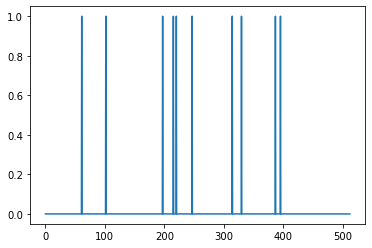

In [11]:
fig, ax = plt.subplots()
for i in range(50):

    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][50+i]["countArray"]
    fifoFreq = data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

    nbOfSamples = len(signal_1000)
    integrationDuration = nbOfSamples*(1/fifoFreq)*1000 # in ms

    t = np.arange(0, integrationDuration, integrationDuration / nbOfSamples)

    d = {'t': t, 'signal_1000': signal_1000}
    df = pd.DataFrame(data=d)


ax.plot(df.t, df.signal_1000)

In [12]:
heatmap = np.reshape(signal_1000, (1, len(signal_1000)))

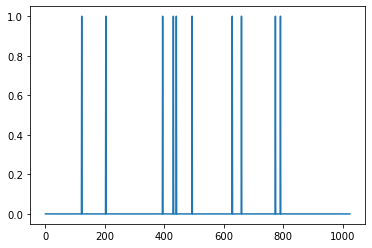

In [13]:
fig, ax = plt.subplots()
ax.plot(df.signal_1000)

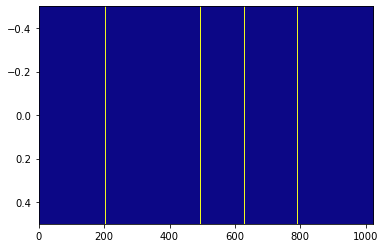

In [14]:
fig, ax = plt.subplots()
ax.imshow(heatmap, cmap="plasma", aspect='auto', interpolation="none")

In [15]:
signal_1000 = data[1]['BXSCINT_1000/Acquisition'][0]["countArray"]
heatmap = np.reshape(signal_1000, (1, len(signal_1000)))
for i in range(len(data[1]['BXSCINT_1000/Acquisition'])):
    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][i]["countArray"]
    heatmap=np.vstack([signal_1000, heatmap])

Text(0.5, 1.0, '750 MeV/u')

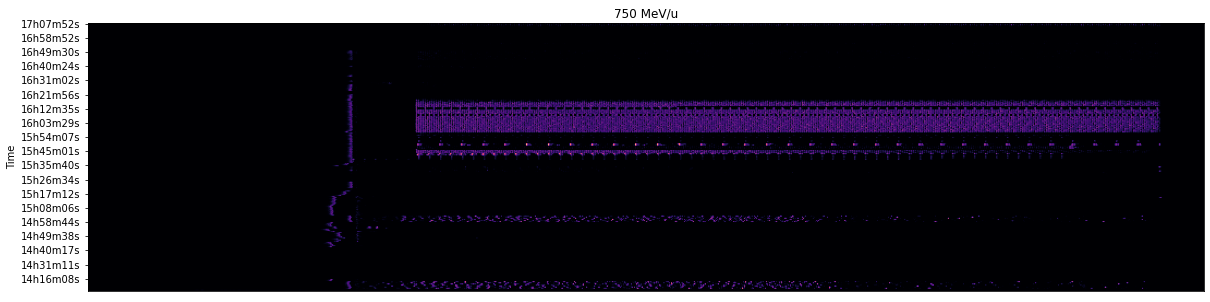

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(heatmap[:len(heatmap)], cmap="magma")

x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
step = np.shape(heatmap)[0]//20 + 1
ax.set_yticks(np.arange(0, np.shape(heatmap)[0],  step))
try:
    ax.set_yticklabels(time_list[::-step]) # Reverse order
except:
    print("error on yticklabels")

ax.set_ylabel("Time")
ax.set_title("750 MeV/u")
# plt.savefig("bxscint_spill_history_750_MeV.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

## FFT

In [26]:
from scipy.fft import rfft, rfftfreq

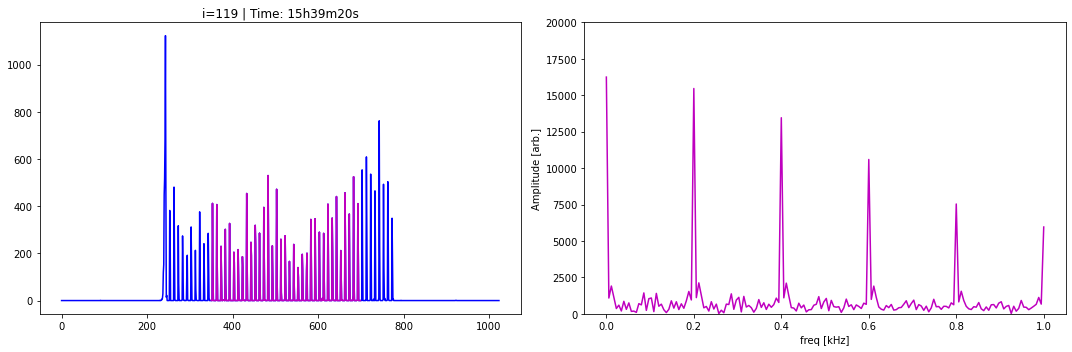

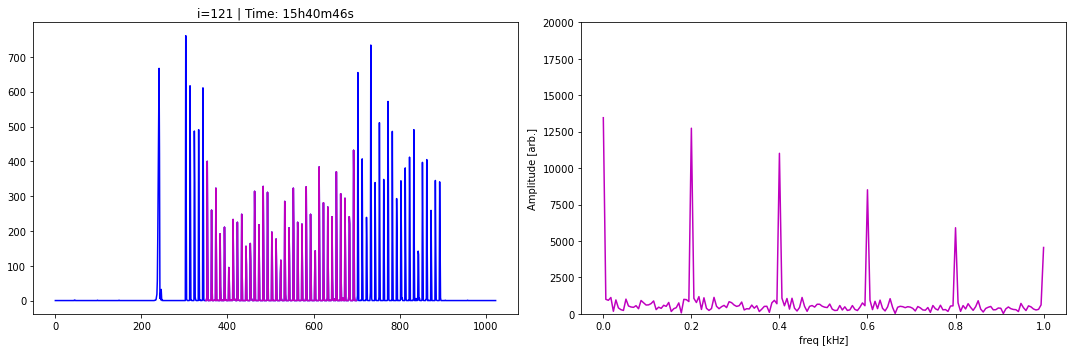

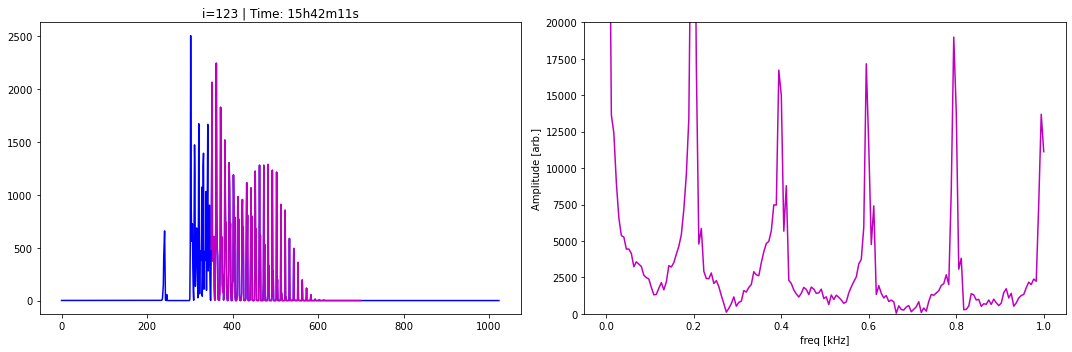

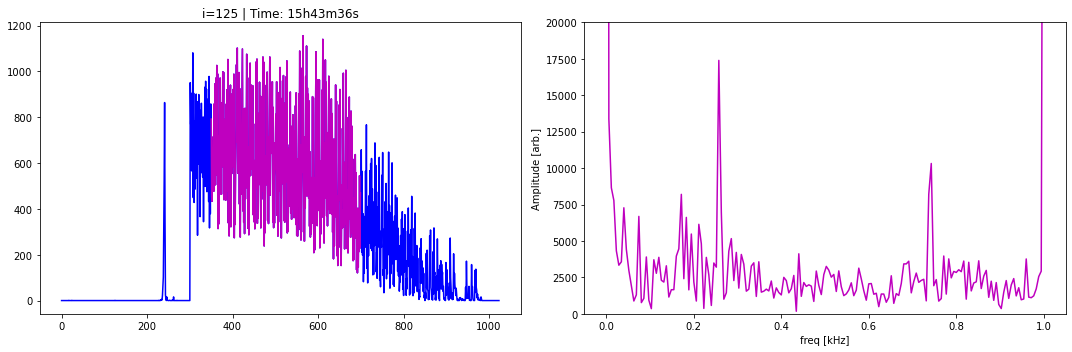

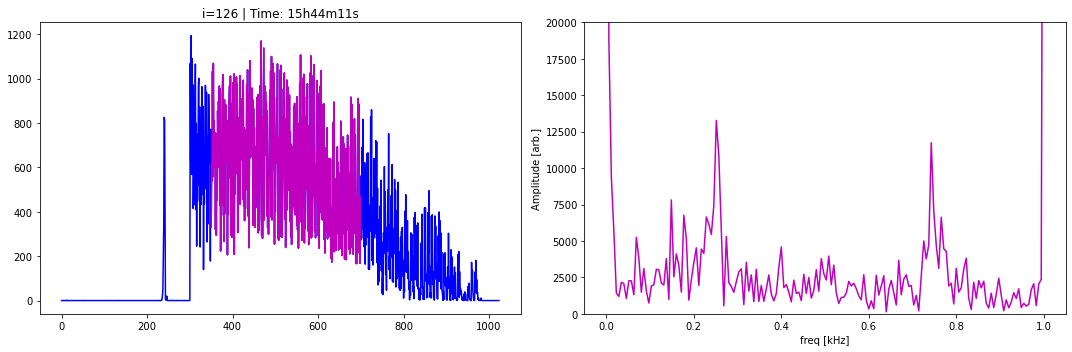

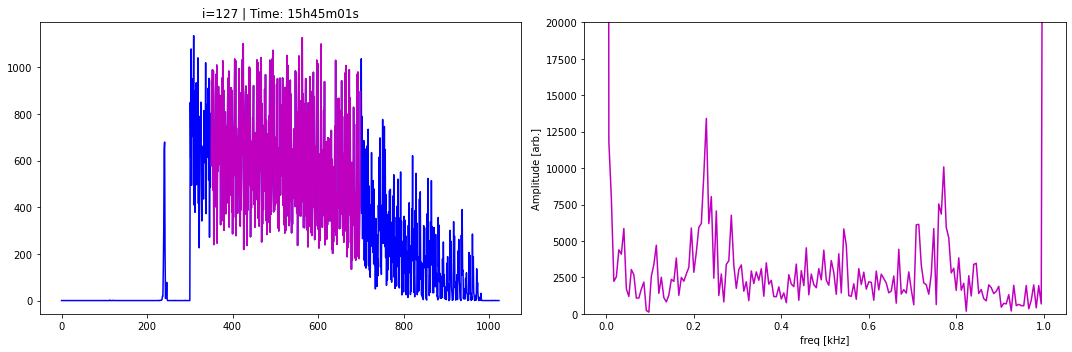

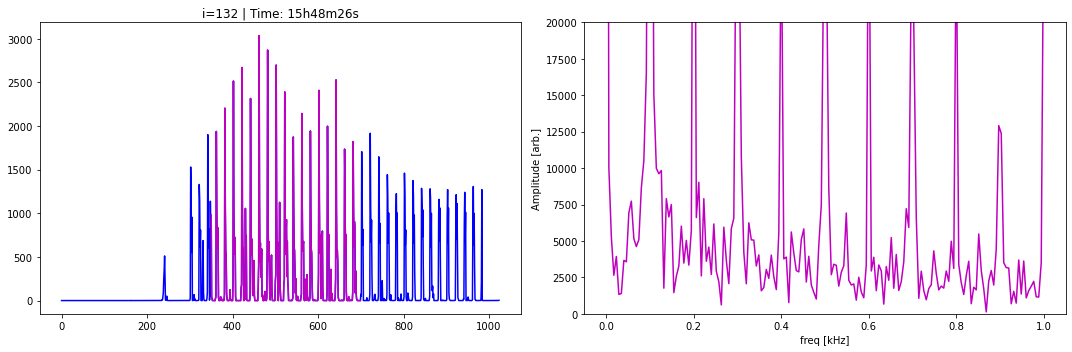

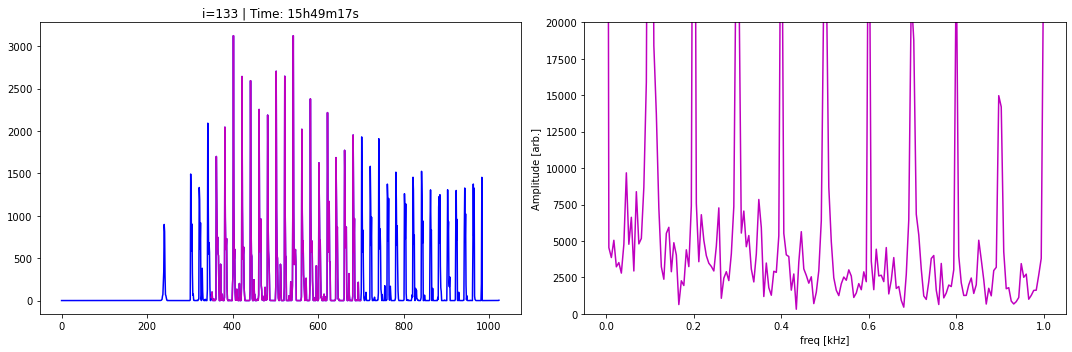

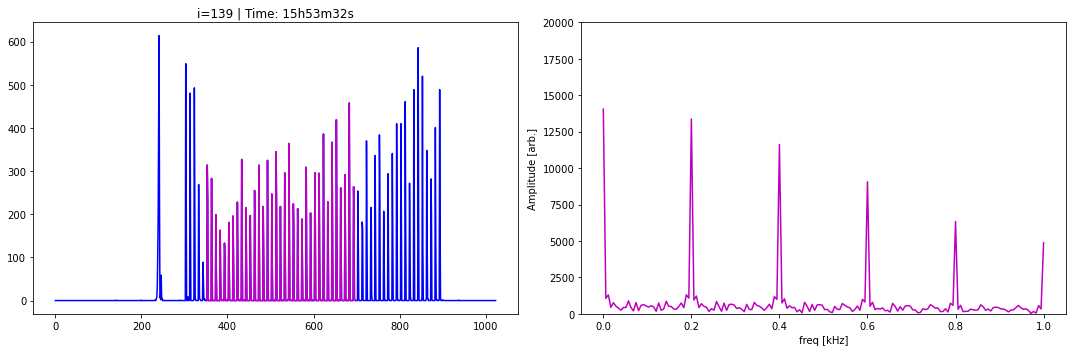

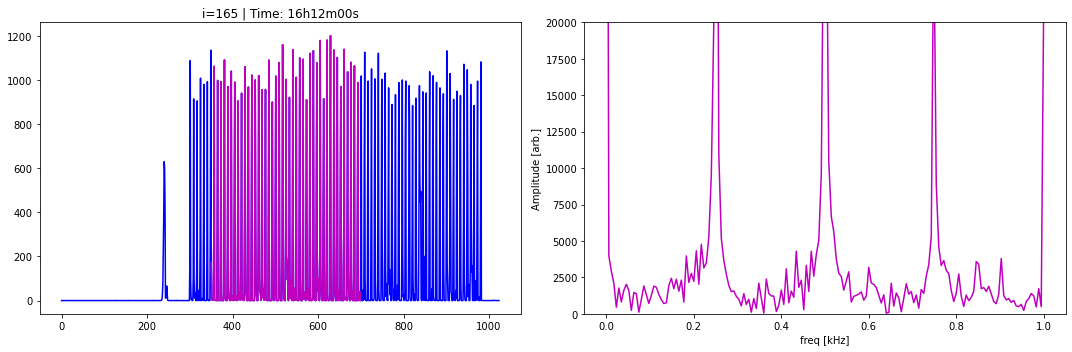

In [114]:
for i in ([119, 120, 121, 122, 123, 124, 125, 126, 127,130, 132, 133, 135, 136, 139, 165, 166, 169, 170,]):

    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][i]["countArray"]
    signal_1001 = data[1]['BXSCINT_1001/Acquisition'][i]["countArray"]
    fifoFreq = data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

    nbOfSamples = len(signal_1000)
    integrationDuration = nbOfSamples*(1/fifoFreq)*1000 # in ms

    t = np.arange(0, integrationDuration, integrationDuration / nbOfSamples)

    d = {'t': t, 'signal_1000': signal_1000, 'signal_1001': signal_1001}
    df = pd.DataFrame(data=d)

    # FFT
    fig, ax = plt.subplots(1,2, figsize=(15,5), tight_layout=True)


    ax[0].set_title(f"i={i} | Time: "+str(data[0][i].strftime("%Hh%Mm%Ss")))
    ax[0].plot(df.signal_1000, c="b")
#     ax[0].plot(df.signal_1001)

    bound_min = 350
    bound_max = 700
    ax[0].plot(df.signal_1000[bound_min:bound_max], c="m")
#     ax[0].plot(df.signal_1001[bound_min:bound_max])


    yf = rfft(df.signal_1000[bound_min:bound_max])
    xf = rfftfreq(len(df.signal_1000[bound_min:bound_max]), (1/fifoFreq))
    ax[1].plot(np.array(xf)*1e-3, np.abs(yf), c="m")
    
#     yf = rfft(df.signal_1001[bound_min:bound_max])
#     xf = rfftfreq(len(df.signal_1001[bound_min:bound_max]), 1e-3)
#     ax[1].plot(np.array(xf)*1e-3, np.abs(yf))
    
    
    ax[1].set_xlabel("freq [kHz]")
    ax[1].set_ylabel("Amplitude [arb.]")
    # ax[1].set_xlim(0.01,0.4)
    ax[1].set_ylim(0,20000)

In [110]:
for i in ([119,]):

    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][i]["countArray"]
    signal_1001 = data[1]['BXSCINT_1001/Acquisition'][i]["countArray"]
    fifoFreq = data[1]['BXSCINT_1000/Acquisition'][i]["fifoFreq"]

    nbOfSamples = len(signal_1000)
    integrationDuration = nbOfSamples*(1/fifoFreq)*1000 # in ms

    t = np.arange(0, integrationDuration, integrationDuration / nbOfSamples)

    d = {'t': t, 'signal_1000': signal_1000, 'signal_1001': signal_1001}
    df = pd.DataFrame(data=d)

    # FFT
    fig, ax = plt.subplots(1,2, figsize=(15,5), tight_layout=True)

    ax[0].set_title(f"i={i} | Time: "+str(data[0][i].strftime("%Hh%Mm%Ss")))
    ax[0].plot(df.signal_1000, c="b")
#     ax[0].plot(df.signal_1001)

    ax[0].set_xlabel("Samples []")
    ax[0].set_ylabel("Ampitude [arb.]")

    bound_min = 250
    bound_max = 750
    ax[0].plot(df.signal_1000[bound_min:bound_max], c="r")
#     ax[0].plot(df.signal_1001[bound_min:bound_max])


    yf = rfft(df.signal_1000[bound_min:bound_max])
    xf = rfftfreq(len(df.signal_1000[bound_min:bound_max]), (1/fifoFreq))
    ax[1].plot(np.array(xf)*1e-3, np.abs(yf), c="b")
    
#     yf = rfft(df.signal_1001[bound_min:bound_max])
#     xf = rfftfreq(len(df.signal_1001[bound_min:bound_max]), 1e-3)
#     ax[1].plot(np.array(xf)*1e-3, np.abs(yf))
    
    
    ax[1].set_xlabel("freq [kHz]")
    ax[1].set_ylabel("Amplitude [arb.]")
    # ax[1].set_xlim(0.01,0.4)
    ax[1].set_ylim(0,20000)